# 340 Mini Project - Global Population Stats

Research Question- What are different factors present in rich vs poor countries?
Dataset: https://www.kaggle.com/datasets/raveennimbiwal/global-population-stats-2024 


## Import and Cleaning

First, I import my dataset from my s3 bucket, and show the top 5 lines to verify it is correct

In [3]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd

df = pd.read_csv('s3://miniproject340-239238489/global_population_stats_2024.csv') # load the data from s3
df.head() #show the top 5 rows

,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0


show the number of rows and columns 

In [2]:
df.shape

(192, 8)

Show the data types and number of null values. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            192 non-null    object 
 1   Population Aged 0 to 14 (%)        192 non-null    float64
 2   Population Aged 60 and Over (%)    192 non-null    float64
 3   Population density                 192 non-null    float64
 4   Population(in millions)            192 non-null    float64
 5   Female Population(in millions)     192 non-null    float64
 6   Male Population(in millions)       192 non-null    float64
 7   Sex ratio (males per 100 females)  192 non-null    float64
dtypes: float64(7), object(1)
memory usage: 12.1+ KB


Show the number of rows containing null value. This dataset has no null values, but, if it did I would use df = df.dropna() 
df.isnull().sum() to remove them from the dataset

In [6]:
df.isnull().sum()

Country                              0
Population Aged 0 to 14 (%)          0
Population Aged 60 and Over (%)      0
Population density                   0
Population(in millions)              0
Female Population(in millions)       0
Male Population(in millions)         0
Sex ratio (males per 100 females)    0
dtype: int64

Show statistical data about each column

In [7]:
df.describe()

,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females)
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,26.308333,14.167188,348.131771,42.267812,21.012708,21.255156,101.186458
std,10.328998,9.106158,1969.940293,151.787795,74.169644,77.631324,16.366059
min,10.600000,3.300000,2.200000,0.010000,0.000000,0.000000,85.200000
25%,17.000000,6.100000,36.550000,2.180000,1.037500,1.082500,95.950000
50%,24.650000,11.250000,90.300000,9.455000,4.720000,4.660000,98.700000
75%,36.350000,22.250000,209.725000,32.467500,15.750000,16.387500,101.400000
max,49.000000,43.500000,25926.800000,1450.940000,702.610000,748.320000,248.200000


In many cases, the cleaning process for a dataset would be mmuch more than what is shown above, but this dataset was cleaned by the creator. Often, we change names of columns, remove null, delete duplicates, etc.

## Create new variable

The dataset provides a % of population for two age groups, I want to also have the middle age group represented. This supports my research question because it allows me to have a new varible to use in data visualizations

In [9]:
df['Population Aged 15 to 59 (%)'] = 100 - (df['Population Aged 0 to 14 (%)'] + df['Population Aged 60 and Over (%)'])

df['Population Aged 15 to 59 (%)'] = df['Population Aged 15 to 59 (%)'].round(2)

df.head()

,Country,Population Aged 0 to 14 (%),Population Aged 60 and Over (%),Population density,Population(in millions),Female Population(in millions),Male Population(in millions),Sex ratio (males per 100 females),Population Aged 15 to 59 (%)
0,Afghanistan,42.9,3.9,65.7,42.65,21.12,21.53,102.0,53.2
1,Albania,16.8,23.5,101.9,2.79,1.41,1.38,97.8,59.7
2,Algeria,30.3,10.0,19.7,46.81,22.94,23.87,104.1,59.7
3,Andorra,11.9,23.2,174.3,0.08,0.04,0.04,104.6,64.9
4,Angola,44.4,4.6,30.4,37.89,19.14,18.75,98.0,51.0


## Query

To help identify rich and poor countries, I ran code to catagorize nations based on their population distribution.

In [13]:
poor_country_like = df[df['Population Aged 0 to 14 (%)'] > 30]

# Filter countries with a high percentage of elderly population (likely richer economies)
rich_country_like = df[df['Population Aged 60 and Over (%)'] > 20]

poor_country_like[['Country', 'Population Aged 0 to 14 (%)']].head(100), \
rich_country_like[['Country', 'Population Aged 60 and Over (%)']].head(150)

(         Country  Population Aged 0 to 14 (%)
 0    Afghanistan                         42.9
 2        Algeria                         30.3
 4         Angola                         44.4
 18         Benin                         41.6
 22      Botswana                         32.1
 ..           ...                          ...
 185   Uzbekistan                         31.1
 186      Vanuatu                         38.3
 189        Yemen                         41.1
 190       Zambia                         41.5
 191     Zimbabwe                         40.9
 
 [71 rows x 2 columns],
                       Country  Population Aged 60 and Over (%)
 1                     Albania                             23.5
 3                     Andorra                             23.2
 7                     Armenia                             20.4
 8                   Australia                             23.5
 9                     Austria                             27.9
 14                   Barb

## Visualizations

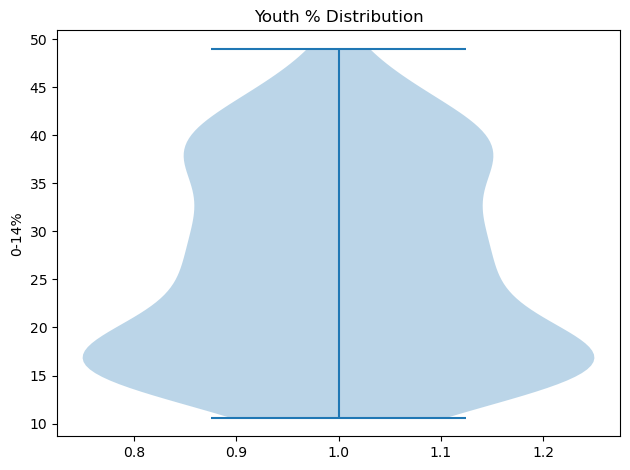

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure()
plt.violinplot(df['Population Aged 0 to 14 (%)'])
plt.title('Youth % Distribution')
plt.ylabel('0-14%')
plt.tight_layout()
plt.show()

This code shows the average youth distribution for all the countries in the dataset.

<Axes: xlabel='Population Aged 60 and Over (%)', ylabel='Count'>

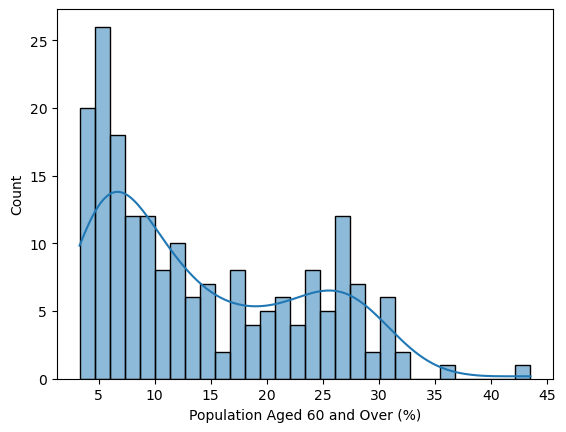

In [9]:
import seaborn as sns
sns.histplot(df['Population Aged 60 and Over (%)'], kde=True, bins=30)

This chart shows how many countries have fall under a certain population over 60 range.